In [19]:
import pandas as pd
from os.path import join
from collections import defaultdict
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [20]:
def matplotlib_setup():
    figure(figsize=(25,12))
    font = {'size'   : 45}
    plt.rc('font', **font)
    plt.rcParams["axes.linewidth"]  = 2.5
    
obsr_rate = defaultdict(list)
benign_obsr_rate = defaultdict(list)

In [21]:
roots = [
    '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_10.0/SRS_SI_10_l',
    '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_1.0/SRS_SI_100_l',
        '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_0.1/SRS_SI_1000_l',
]

for root in roots:
    df = pd.read_csv(join(root,'observation_rate.csv'))
    #print(df.head())
    obsr_rate['srs'].append(df[df['Label']=='Macro average Observation Rate']['Observation rate'].values[0])
    benign_obsr_rate['srs'].append(df[df['Label']=='Benign']['Observation rate'].values[0])
obsr_rate['srs']

[83.97153846153847, 46.60153846153847, 18.92]

In [40]:
roots = [
    '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_10.0/SFS_SI_9.77_l',
        '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_1.0/SFS_SI_95.33_l',
            '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_0.1/SFS_SI_930.75_l',
        ]
obsr_rate['sfs'] = []
benign_obsr_rate['sfs'] = []
for root in roots:
    df = pd.read_csv(join(root,'observation_rate.csv'))
    #print(df.head())
    obsr_rate['sfs'].append(df[df['Label']=='Macro average Observation Rate']['Observation rate'].values[0])
    benign_obsr_rate['sfs'].append(df[df['Label']=='Benign']['Observation rate'].values[0])
obsr_rate['sfs']

[90.98230769230769, 47.2523076923077, 22.74153846153846]

In [31]:
roots = [
    '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_10.0/SGS_e_0.05_l',
    '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_1.0/SGS_e_1_l',
    '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_0.1/SGS_e_10_l',
        ]

for root in roots:
    df = pd.read_csv(join(root,'observation_rate.csv'))
    #print(df.head())
    obsr_rate['sgs'].append(df[df['Label']=='Macro average Observation Rate']['Observation rate'].values[0])
    benign_obsr_rate['sgs'].append(df[df['Label']=='Benign']['Observation rate'].values[0])
obsr_rate['sgs']

[90.64769230769232, 46.7223076923077, 8.426923076923076]

In [34]:
roots = [
    '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_10.0/FFS_(8,16,4)_l',
    '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_1.0/FFS_(8,16,40)_l',
    '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_0.1/FFS_(8,16,400)_l',
        ]
obsr_rate['ffs'] = []
benign_obsr_rate['ffs'] = []
for root in roots:
    df = pd.read_csv(join(root,'observation_rate.csv'))
    #print(df.head())
    obsr_rate['ffs'].append(df[df['Label']=='Macro average Observation Rate']['Observation rate'].values[0])
    benign_obsr_rate['ffs'].append(df[df['Label']=='Benign']['Observation rate'].values[0])
obsr_rate['ffs']

[83.76, 46.715384615384615, 19.214615384615385]

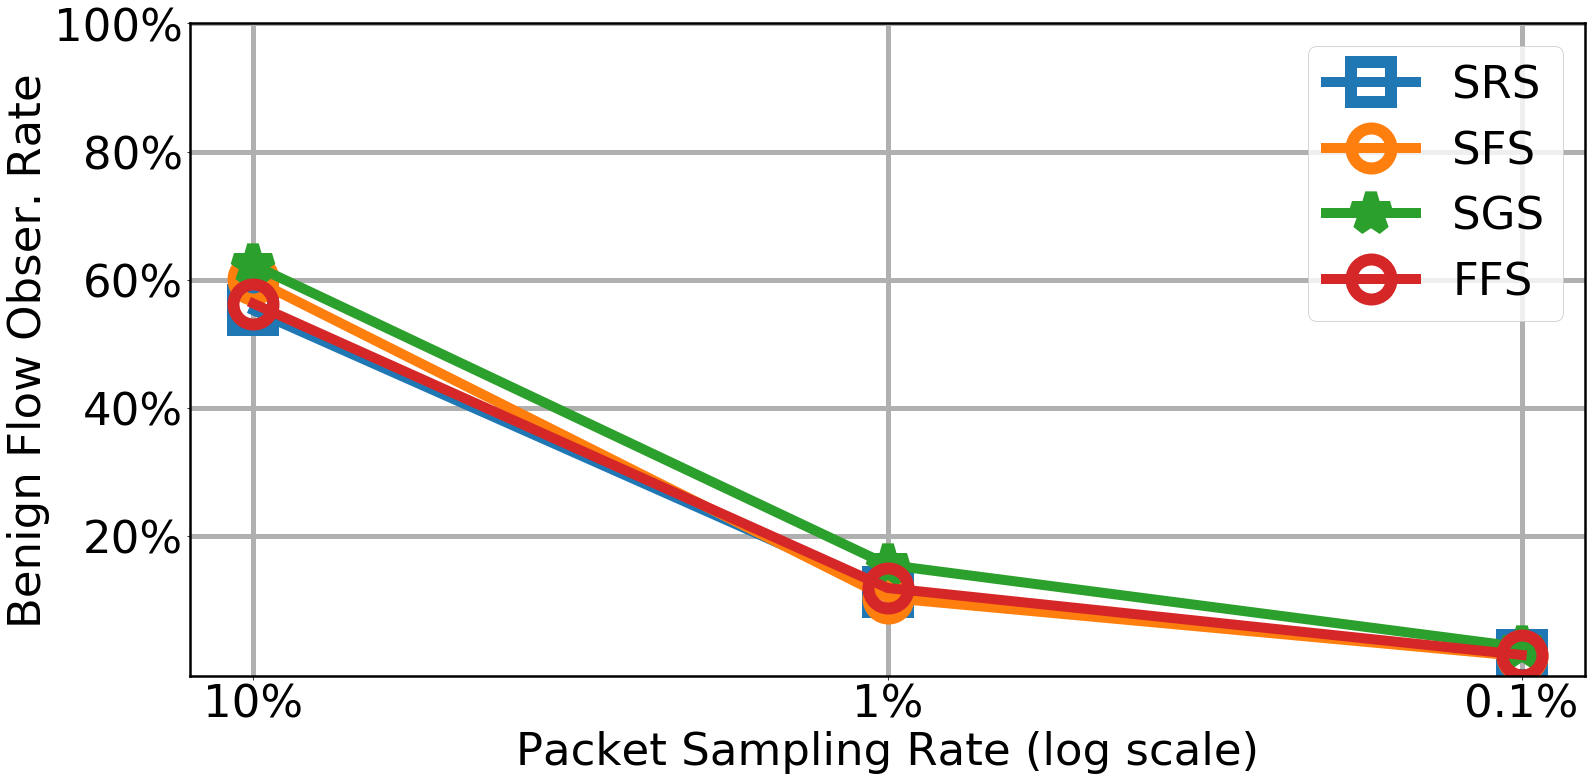

In [53]:
matplotlib_setup()
markers = ['>','*','<','o','^','X','D','8','h','d','>','*','<','o']
msz = 40
medgewdth = 12
linewidth = 10
plt.plot(benign_obsr_rate['srs'],label = 'SRS',linewidth=linewidth,marker='s',markersize=msz,markeredgewidth=medgewdth,markerfacecolor='none')
plt.plot(benign_obsr_rate['sfs'],label = 'SFS',linewidth=linewidth,marker='o',markersize=msz,markeredgewidth=medgewdth,markerfacecolor='none')
plt.plot(benign_obsr_rate['sgs'],label = 'SGS',linewidth=linewidth,marker=markers[1],markersize=msz,markeredgewidth=medgewdth,markerfacecolor='none')
plt.plot(benign_obsr_rate['ffs'],label = 'FFS',linewidth=linewidth,marker=markers[3],markersize=msz,markeredgewidth=medgewdth,markerfacecolor='none')


plt.grid(linewidth=5)
plt.legend(ncol=1)
plt.ylabel('Benign Flow Obser. Rate')
plt.xlabel("Packet Sampling Rate (log scale)")
#plt.ylim([10,100])
plt.xticks(np.arange(3),['10%','1%','0.1%'])
plt.yticks(np.arange(20,120,20),[str(i)+'%' for i in np.arange(20,120,20)])

plt.savefig('/data/juma/data/ids18/observation_rate_benign.png',dpi=100)
plt.show()


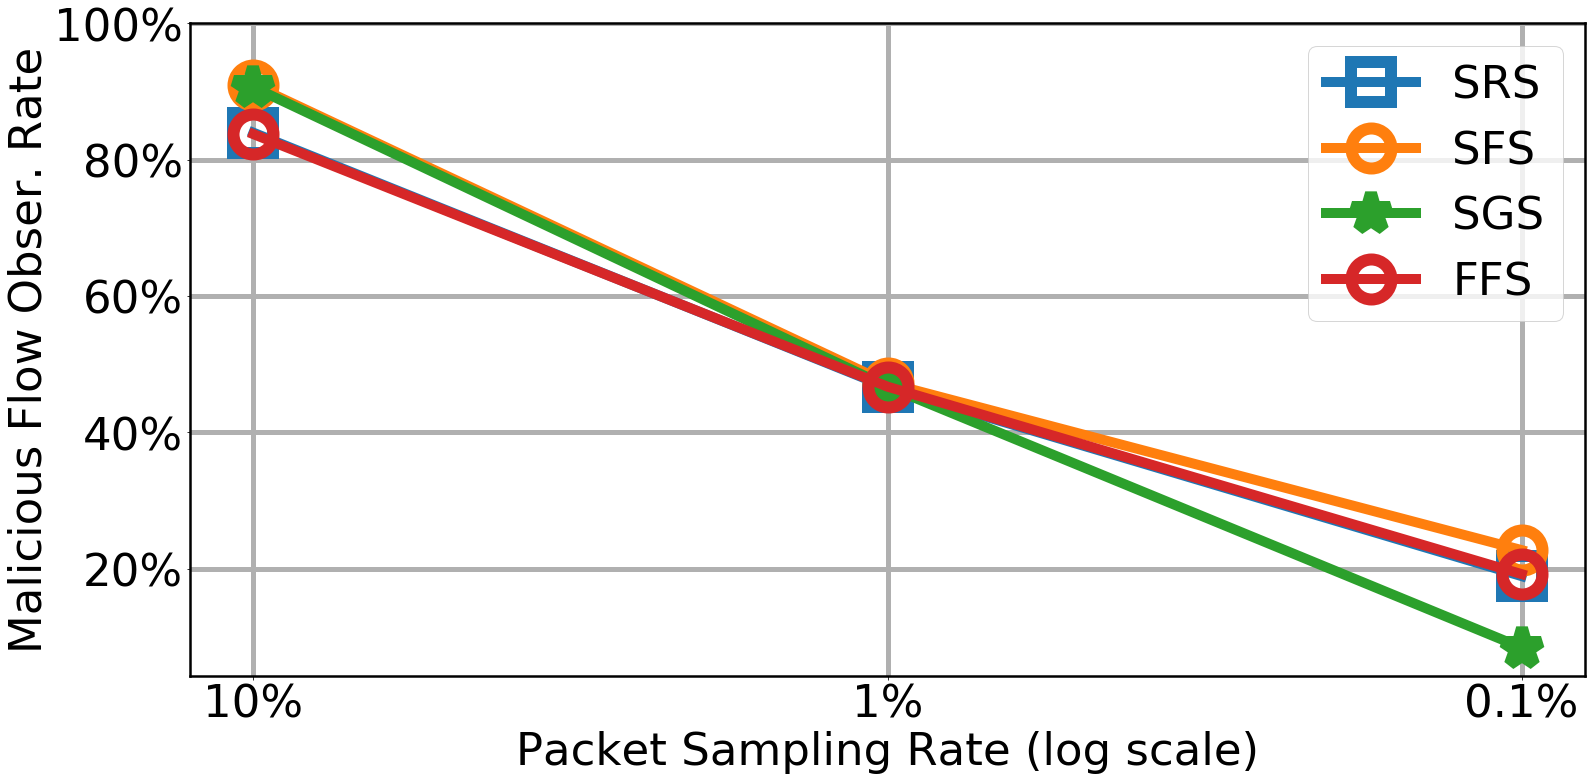

In [54]:
matplotlib_setup()

plt.plot(obsr_rate['srs'],label = 'SRS',linewidth=linewidth,marker='s',markersize=msz,markeredgewidth=medgewdth,markerfacecolor='none')
plt.plot(obsr_rate['sfs'],label = 'SFS',linewidth=linewidth,marker='o',markersize=msz,markeredgewidth=medgewdth,markerfacecolor='none')
plt.plot(obsr_rate['sgs'],label = 'SGS',linewidth=linewidth,marker=markers[1],markersize=msz,markeredgewidth=medgewdth,markerfacecolor='none')
plt.plot(obsr_rate['ffs'],label = 'FFS',linewidth=linewidth,marker=markers[3],markersize=msz,markeredgewidth=medgewdth,markerfacecolor='none')


plt.grid(linewidth=5)
plt.legend(ncol=1)
plt.ylabel('Malicious Flow Obser. Rate')
plt.xlabel("Packet Sampling Rate (log scale)")
#plt.ylim([10,100])
plt.xticks(np.arange(3),['10%','1%','0.1%'])
plt.yticks(np.arange(20,120,20),[str(i)+'%' for i in np.arange(20,120,20)])

plt.savefig('/data/juma/data/ids18/observation_rate.png',dpi=100)
plt.show()


In [10]:
roots = [
    '/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(8,16,4)_l',    
    '/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(8,16,40)_l',        
        '/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(8,16,400)_l']

ffs_8_16_avg = []
sel_benign_obsr = []
for root in roots:
    df = pd.read_csv(join(root,'observation_rate.csv'))
    #print(df.head())
    ffs_8_16_avg.append(df[df['Label']=='Macro average Observation Rate']['Observation rate'].values[0])
    

FileNotFoundError: [Errno 2] File b'/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(8,16,40)_l/observation_rate.csv' does not exist: b'/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(8,16,40)_l/observation_rate.csv'

In [34]:
roots = [
    '/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(8,64,1)_l',    
    '/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(3,64,3)_l',        
        '/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(3,64,30)_l']

counts_d = defaultdict(list)
ffs_3_64_avg = []
for root in roots:
    df = pd.read_csv(join(root,'observation_rate.csv'))
    #print(df.head())
    ffs_3_64_avg.append(df[df['Label']=='Macro average Observation Rate']['Observation rate'].values[0])
    

In [38]:
roots = [
    '/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(16,29,5)_l',    
    '/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(16,32,46)_l',        
        '/data/juma/data/ids18/CSVs_r_1.0/SR_10/FFS_(16,32,460)_l']

counts_d = defaultdict(list)
ffs_16_32_avg = []
for root in roots:
    df = pd.read_csv(join(root,'observation_rate.csv'))
    #print(df.head())
    ffs_16_32_avg.append(df[df['Label']=='Macro average Observation Rate']['Observation rate'].values[0])
    

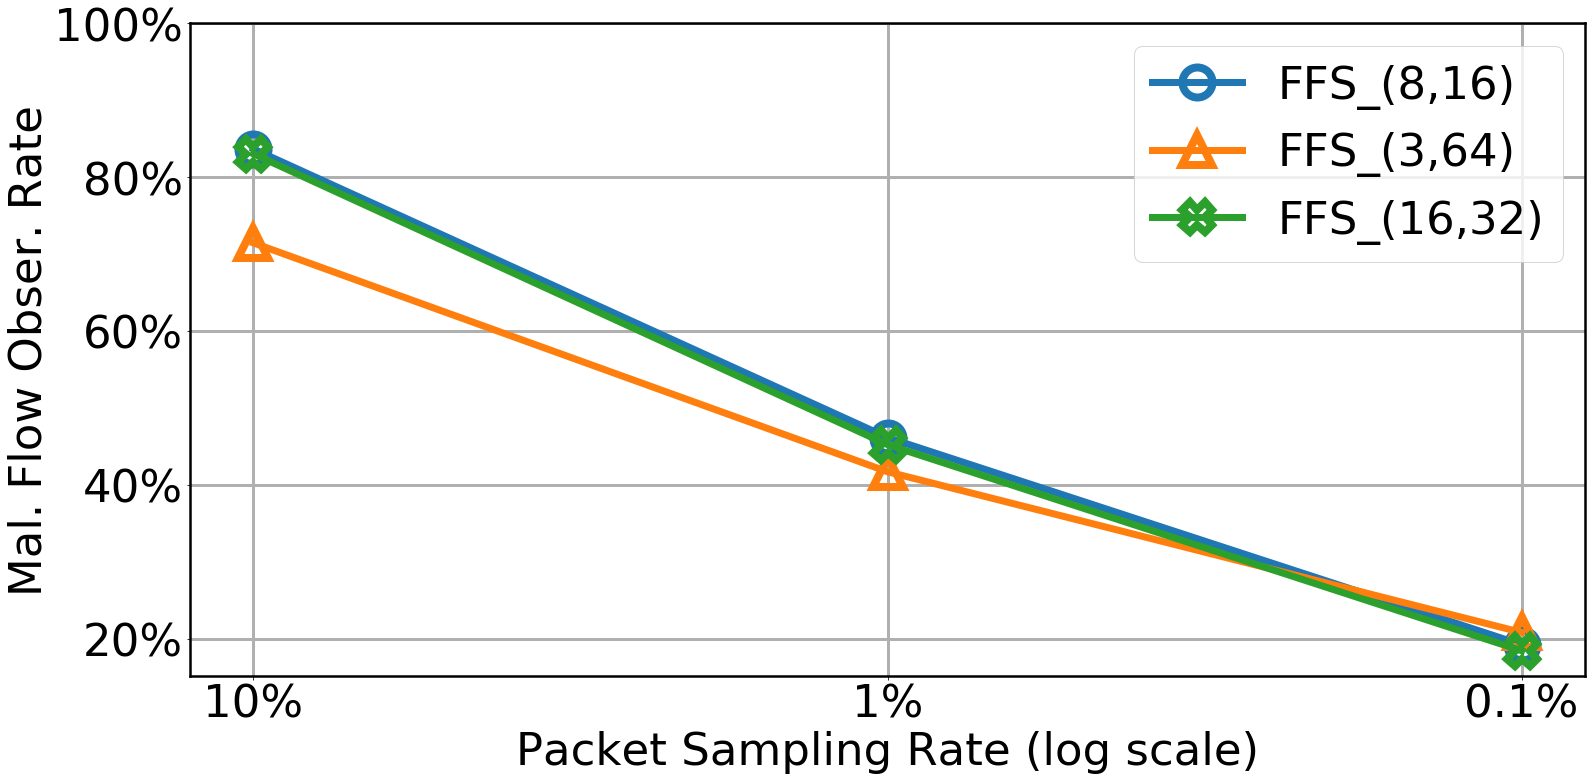

In [41]:
figure(figsize=(25,12))
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
markers = ['>','*','<','o','^','X','D','8','h','d','>','*','<','o']

plt.plot(ffs_8_16_avg,label = 'FFS_(8,16)',linewidth=7,marker=markers[3],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(ffs_3_64_avg,label = 'FFS_(3,64)',linewidth=7,marker=markers[4],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.plot(ffs_16_32_avg,label = 'FFS_(16,32)',linewidth=7,marker=markers[5],markersize=30,markeredgewidth=8,markerfacecolor='none')

#for i,(label,counts) in enumerate(counts_d.items()):
#    plt.plot(counts,label=label,linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')


plt.grid(linewidth=3)
plt.legend(ncol=1)
plt.ylabel('Mal. Flow Obser. Rate')
plt.xlabel("Packet Sampling Rate (log scale)")
#plt.ylim([10,100])
plt.xticks(np.arange(3),['10%','1%','0.1%'])
plt.yticks(np.arange(20,120,20),[str(i)+'%' for i in np.arange(20,120,20)])

plt.savefig('/data/juma/data/ids18/observation_rate_ffs.png')
plt.show()
